In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1)	Read the dataset

In [2]:
data = pd.read_csv('credit_card.csv')
data.head()
df = data.copy()

# 2)	Remove/handle null values if any

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
df = data.copy()
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 3)	Perform feature engineering steps (if required)

In [5]:
data['PURCHASES_TRX'] = pd.cut(data['PURCHASES_TRX'],bins=[0,120,240,360],labels=['Low','Medium','High'])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,Low,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,NaN,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,Low,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,Low,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,Low,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data = df

# 4)	Standardize the data 

In [7]:
x = data.iloc[:,1:]
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_data = sc.fit_transform(x)
scale_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# 5)	Apply PCA to reduce the number of features

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=6)
x_new = pca.fit_transform(scale_data) 
x_new  # principal components

array([[-1.68222026, -1.07645061,  0.48850652,  0.66555177,  0.01822453,
         0.05062893],
       [-1.1382949 ,  2.50647666,  0.60121233, -0.12043722,  0.60580288,
        -1.13684066],
       [ 0.96968401, -0.3835203 ,  0.10237138,  1.20926609, -2.17258431,
        -0.21722246],
       ...,
       [-0.92620364, -1.8107856 , -0.47472306, -2.28023929,  0.38655287,
         2.97694806],
       [-2.33655167, -0.65796601,  0.97472512, -1.86127859,  0.06977883,
         3.17438039],
       [-0.55642216, -0.40046712,  1.01519557, -1.95323733, -1.24300026,
         3.75329147]])

In [11]:
eig_val = pca.explained_variance_  # Eigen Values
eig_vec = pca.components_          # Eigen Vectors
print(eig_val)
print(eig_vec)

[4.63982474 3.45172419 1.49480352 1.27173785 1.06479362 0.97764515]
[[ 0.1010775   0.12004342  0.41164155  0.34640703  0.33681432 -0.02334324
   0.32149284  0.2946332   0.27470974 -0.08913903 -0.04865394  0.39069524
   0.21166292  0.26624897  0.06035128  0.13211231  0.0810205 ]
 [ 0.40395722  0.13053705  0.04103786  0.06287187 -0.0185328   0.43924153
  -0.19078025 -0.01792382 -0.17860091  0.43408232  0.41973386 -0.01939408
   0.23867794  0.25747607  0.16696952 -0.19002551 -0.00432648]
 [-0.16007504 -0.42062987  0.25790273  0.39211489 -0.11048839 -0.0273454
  -0.37469147  0.11513072 -0.47340919 -0.10907217 -0.1155405  -0.07733064
   0.10048344  0.27623652 -0.22163462  0.12477356 -0.06432602]
 [ 0.28345358  0.14974216  0.03911137  0.07815467 -0.05113028 -0.25458577
  -0.18897486  0.02746458 -0.21500183 -0.26422752 -0.32692378 -0.01810917
   0.13165127 -0.11476706  0.40290911 -0.42442633  0.43528543]
 [ 0.04760344 -0.48456281  0.03128671 -0.15584608  0.36026626  0.09667699
  -0.09243539 -

In [12]:
tot = sum(eig_val)
var_eig_val = [(i/tot)*100 for i in eig_val]
print(var_eig_val)
cum_var_eig_val = np.cumsum(var_eig_val)
print(cum_var_eig_val)

[35.966158558158924, 26.756454508039422, 11.58714897741486, 9.858028601616532, 8.253875570010852, 7.578333784759401]
[ 35.96615856  62.72261307  74.30976204  84.16779065  92.42166622
 100.        ]


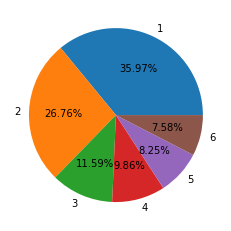

In [13]:
plt.pie(eig_val,labels=[1,2,3,4,5,6],autopct='%.2f%%')
plt.show()

# 6)	Apply K-Means clustering to categorize the dataset

In [14]:
from sklearn.cluster import KMeans

In [20]:
k5 = KMeans(n_clusters=7)
k5.fit(x)
ypred = k5.predict(x)
ypred

array([0, 1, 3, ..., 0, 0, 0])

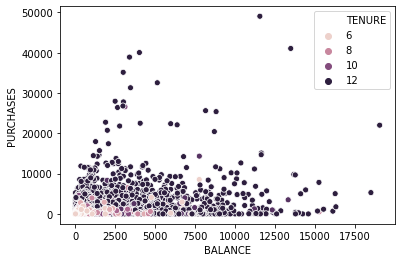

In [21]:
sns.scatterplot(data['BALANCE'],data['PURCHASES'],hue=data['TENURE'])
plt.show()